In [70]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import hinge_loss, accuracy_score

In [71]:
data = pd.read_excel('Youngs.xlsx')

In [72]:
le = LabelEncoder()
scaler = MinMaxScaler()

data['Cluster_Encoded'] = le.fit_transform(data['Cluster'])     # 0 = healthy, 1 = unhealthy
data['Youngs_Normalised'] = scaler.fit_transform(data['Youngs'].values.reshape(-1, 1))

dataTable = pd.DataFrame({
    'Youngs': data['Youngs_Normalised'],
    'Cluster': data['Cluster_Encoded']
})

In [73]:
dataTable

,Youngs,Cluster
0,0.027241,0
1,0.028213,0
2,0.053918,0
3,0.025862,0
4,0.042003,0
...,...,...
1273,0.958019,1
1274,0.728522,1
1275,0.825504,1
1276,0.948598,1


In [74]:
X = dataTable['Youngs']
y = dataTable['Cluster']

x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=4900)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, random_state=4900)

x_train = np.array(x_train).reshape(-1, 1)
x_val = np.array(x_val).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [75]:
training_score_list = []
val_score_list = []

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5, 3, 0.5):
        svm = SVC(kernel=kernel, C=c).fit(x_train, y_train)
        y_train_pred = svm.predict(x_train)
        y_val_pred = svm.predict(x_val)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        train_loss = hinge_loss(y_train, y_train_pred)
        training_score_list.append([kernel, c, train_accuracy, val_accuracy, train_loss])

In [76]:
myTable = PrettyTable(["Kernel", "C", "Training Accuracy", "Validation Accuracy", "Training Loss"])
for row in training_score_list:
    myTable.add_row([row[0], row[1], round(row[2]*100, 2), round(row[3]*100, 2), round(row[4], 4)])
print(myTable)

+---------+-----+-------------------+---------------------+---------------+
|  Kernel |  C  | Training Accuracy | Validation Accuracy | Training Loss |
+---------+-----+-------------------+---------------------+---------------+
|  linear | 0.5 |       97.78       |        100.0        |     0.6686    |
|  linear | 1.0 |        97.0       |        98.26        |     0.6763    |
|  linear | 1.5 |       96.91       |        98.26        |     0.6773    |
|  linear | 2.0 |       96.91       |        98.26        |     0.6773    |
|  linear | 2.5 |       96.91       |        98.26        |     0.6773    |
|   poly  | 0.5 |        99.9       |        100.0        |     0.6473    |
|   poly  | 1.0 |       100.0       |        100.0        |     0.6464    |
|   poly  | 1.5 |       99.81       |        100.0        |     0.6483    |
|   poly  | 2.0 |       100.0       |        100.0        |     0.6464    |
|   poly  | 2.5 |        99.9       |        100.0        |     0.6473    |
|   rbf   | 

In [77]:
svm = SVC(kernel='poly', C=0.5)
svm.fit(x_train, y_train)

y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_loss = hinge_loss(y_test, y_test_pred)

print("Testing Accuracy:", test_accuracy)
print("Testing Loss:", test_loss)

Testing Accuracy: 1.0
Testing Loss: 0.703125


In [78]:
print(svm.support_vectors_)

[[0.45935453]
 [0.45390836]
 [0.45656744]
 [0.46193076]
 [0.4601544 ]
 [0.44152631]
 [0.44547013]
 [0.44409454]
 [0.45775482]
 [0.44925191]
 [0.45920899]
 [0.45407963]
 [0.46159163]
 [0.44935449]
 [0.46004039]
 [0.45580327]
 [0.45370679]
 [0.459121  ]
 [0.47928727]
 [0.46301088]
 [0.4724945 ]
 [0.46885897]
 [0.4753715 ]
 [0.46681855]
 [0.48135657]
 [0.4676525 ]
 [0.4716833 ]
 [0.46658405]
 [0.46333711]
 [0.46495515]
 [0.4690448 ]
 [0.4711671 ]
 [0.47803144]
 [0.4689989 ]
 [0.47884584]
 [0.46805154]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


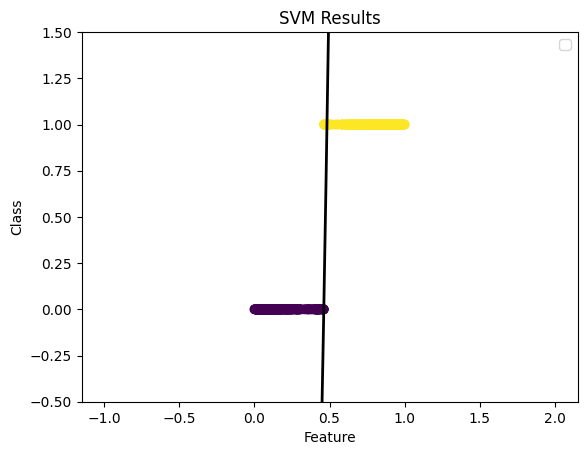

In [79]:
x_min, x_max = x_train.min() - 1, x_train.max() + 1
x_plot = np.linspace(x_min, x_max, 1000)
y_plot = svm.decision_function(x_plot.reshape(-1, 1))

plt.plot(x_plot, y_plot, color='black', linestyle='-', linewidth=2)

support_vectors = svm.support_vectors_
# plt.scatter(support_vectors, np.zeros_like(support_vectors), color='red', marker='o', s=100, label='Support Vectors')

plt.scatter(x_train, y_train, c=y_train, cmap='viridis', label="")

plt.xlabel("Feature")
plt.ylabel("Class")
plt.title("SVM Results")
plt.ylim(-0.5, 1.5)  # Set the y-axis limit
plt.legend()
plt.show()